In [18]:
import plotly as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from sklearn.preprocessing import LabelEncoder  

#https://www.kaggle.com/datasets/crainbramp/steam-dataset-2025-multi-modal-gaming-analytics
df = pd.read_csv('data/applications.csv', usecols=['appid', 'name', 'type','release_date','metacritic_score', 'recommendations_total',
                                                   'mat_final_price','mat_currency', 'mat_achievement_count'], low_memory=False)


df1 = pd.read_csv("data/application_categories.csv")
df2 = pd.read_csv("data/application_developers.csv")
df3 = pd.read_csv("data/application_genres.csv")
df4 = pd.read_csv("data/application_platforms.csv")
df5 = pd.read_csv("data/application_publishers.csv")

In [6]:
#for Later
#dfkey1 = pd.read_csv("data2/categories.csv")
#dfkey2 = pd.read_csv("data2/developers.csv")
#dfkey3 = pd.read_csv("data2/genres.csv")
#dfkey4 = pd.read_csv("data2/platforms.csv")
#dfkey5 = pd.read_csv("data2/publishers.csv")

In [3]:
#df_id = pd.read_csv('data3/games_march2025_cleaned.csv', usecols=['appid', 'name', 'release_date', 'price', 'developers', 'publishers', 'categories', 'genres', 'positive', 'negative', 'peak_ccu', 'pct_pos_total','num_reviews_total'], low_memory=False)
#Top 100,000 sold games March 2025
df_best = pd.read_csv('data3/gamalytic_steam_games.csv', low_memory=False).rename(columns={'steamId' : 'appid'})
#usecols= ['steamId', 'price', 'copiesSold', 'publisherClass', 'reviewScore']

In [6]:
df_best['sale_revenue'] = df_best['price'] * df_best['copiesSold']
#df_best.head(20)
df_best.shape[0]
df_best.head(30)

,appid,price,copiesSold,publisherClass,reviewScore,aiContent,sale_revenue
0,730,0.00,302158048,AAA,87,NaN,0.000000e+00
1,570,0.00,212896574,AAA,82,NaN,0.000000e+00
2,578080,0.00,161971233,AAA,59,NaN,0.000000e+00
3,440,0.00,99060457,AAA,90,NaN,0.000000e+00
4,1172470,0.00,67554185,AAA,67,NaN,0.000000e+00
5,550,9.99,63975495,AAA,98,NaN,6.391152e+08
6,304930,0.00,59633334,Indie,91,NaN,0.000000e+00
7,1782210,0.00,54807548,Hobbyist,92,NaN,0.000000e+00
8,230410,0.00,52803785,AAA,88,NaN,0.000000e+00
9,218620,9.99,37690350,AA,90,NaN,3.765266e+08


In [37]:
avg = df_best['price'].mean()
publishers = df_best['publisherClass'].value_counts()	
free = (df_best['price'] == 0).sum()
more5 = (df_best['price'] > 5).sum()
maxcost = (df_best['price']).max()

print('Average Cost', avg)
print(publishers)
print('count of free:', free)
print('More than 5:', more5)
print('Max:', maxcost)
print(df_best.shape[0])

Average Cost 7.958794488846987
publisherClass
Hobbyist    52161
Indie       37304
AA           2844
AAA          1029
Name: count, dtype: int64
count of free: 13819
More than 5: 39996
Max: 1900.0
93338


In [51]:
grouped = df_best.groupby("publisherClass")["price"].mean().sort_values(ascending=False)
print(grouped_publisher)
grouped_publisherC = df_best.groupby("publisherClass").count().reset_index()
print(grouped_publisherC)

  publisherClass      price
0             AA  20.007458
1            AAA  25.176861
2       Hobbyist   4.895094
3          Indie  10.849151
  publisherClass  appid  price  copiesSold  reviewScore  aiContent  \
0             AA   2844   2844        2844         2844          0   
1            AAA   1029   1029        1029         1029          0   
2       Hobbyist  52161  52161       52161        52161          0   
3          Indie  37304  37304       37304        37304          0   

   sale_revenue  
0          2844  
1          1029  
2         52161  
3         37304  


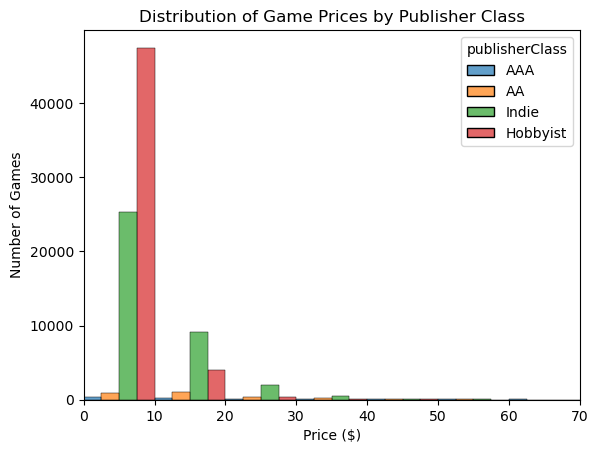

In [84]:
figsize=(12,6)

bins = np.arange(0, 260, 10)
sns.histplot(data=df_best, x="price", hue="publisherClass", 
    bins=bins, stat='count', multiple="dodge", hue_order=['AAA', 'AA', 'Indie', 'Hobbyist'],
    alpha=0.7
)

plt.xlim(0, 70)
plt.title("Distribution of Game Prices by Publisher Class")
plt.xlabel("Price ($)")
plt.ylabel("Number of Games")
plt.show()

In [8]:
df = pd.read_csv('data3/Project_merge.csv', low_memory=False)

In [20]:
cols_to_encode = ['developers', 'publishers']
# Dictionary to store LabelEncoders
encoders = {}

for col in cols_to_encode:
    # Initialize encoder
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    encoders[col] = le
numeric_df = df.select_dtypes(include=['number']).copy()


df['genres'] = df['genres'].str.replace('[', '', regex=False).str.replace(']', '', regex=False)
genre = df['genres'].str.get_dummies(sep=',')
df['categories'] = df['categories'].str.replace('[', '', regex=False).str.replace(']', '', regex=False)
categories = df['categories'].str.get_dummies(sep=',')
publisher = pd.get_dummies(df['publisherClass'], prefix='publisher').astype(int)

numeric_df_final = pd.concat([numeric_df, genre, categories, publisher], axis=1)
#print(numeric_df_final.shape)

C:\Users\pokea\AppData\Local\Temp\ipykernel_17748\1935931015.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


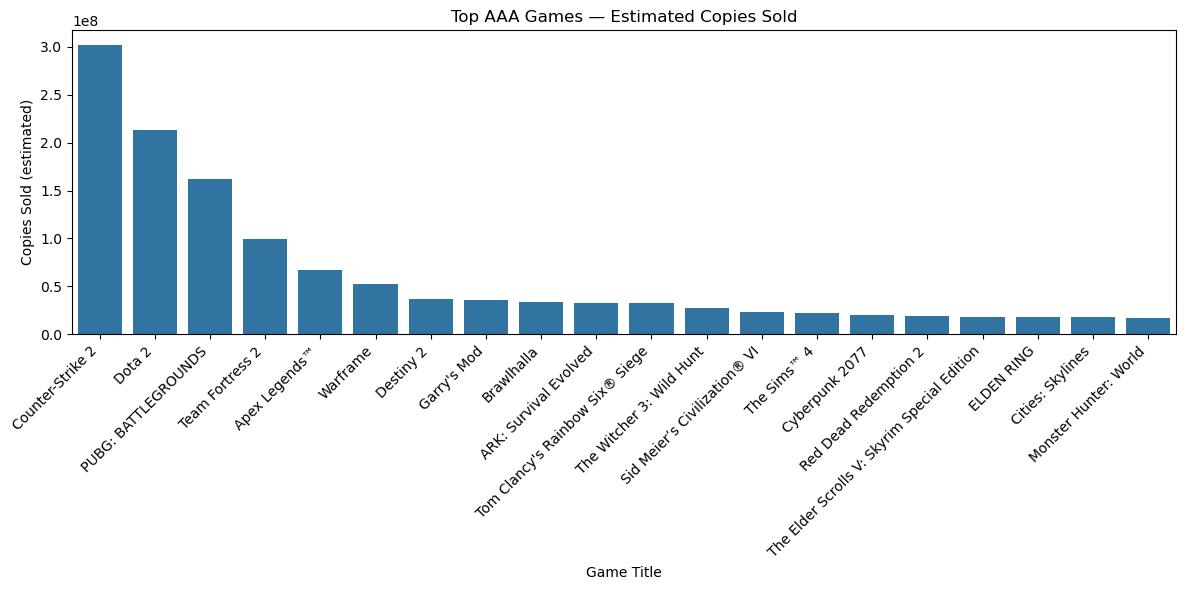

In [14]:
AAA = df[df["publisherClass"] == 'AAA']

# 3. Sort and maybe take top N by copies sold
top_AAA = AAA.sort_values(by="copiesSold", ascending=False).head(20)

# 4. Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_AAA,
    x="name",           # or the appropriate column for game title
    y="copiesSold"
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Top AAA Games — Copies Sold")
plt.xlabel("Game Title")
plt.ylabel("Copies Sold (estimated)")
plt.tight_layout()
plt.show()

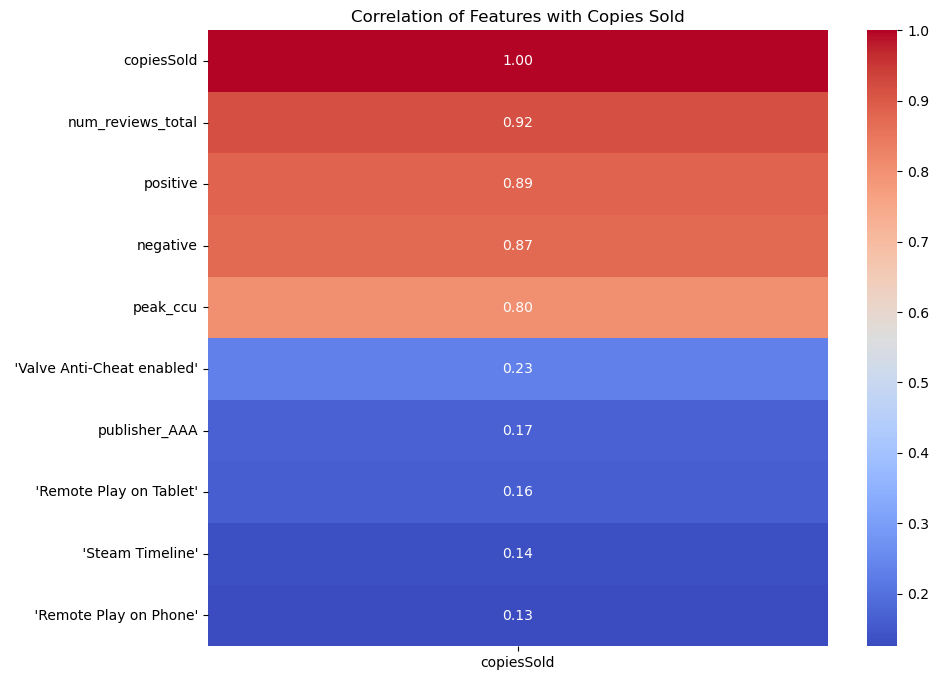

In [22]:
num_df = numeric_df_final.select_dtypes(include=['number'])
corr = num_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr[['copiesSold']].sort_values(by='copiesSold', ascending=False).head(10), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm"
)

plt.title("Correlation of Features with Copies Sold")
plt.show()